In [20]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm
from matplotlib.patches import Polygon
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False 
}
plt.rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = False

In [ ]:
origion_big_error = pd.read_csv('/data/origion_big_1.csv').drop(columns='Unnamed: 0')
origion_small_error = pd.read_csv('/data/origion_small_1.csv').drop(columns = 'Unnamed: 0')
new_big_error = pd.read_csv('/data/new_big_1.csv').drop(columns='Unnamed: 0')
new_small_error = pd.read_csv('/data/new_small_1.csv').drop(columns = 'Unnamed: 0')
magpie_big_error = pd.read_csv('/data/mgpie_big_1.csv').drop(columns = 'Unnamed: 0')
magpie_small_error = pd.read_csv('/data/magpie_small_1.csv').drop(columns = 'Unnamed: 0')
ec_error = pd.read_csv('/data/EC_errror.csv').drop(columns='Unnamed: 0')
ec_big_error = pd.read_csv('/data/ec_error_big.csv').drop(columns='Unnamed: 0')

In [24]:
origion_test_error = origion_big_error['big_1']
origion_valid_error = origion_small_error['small_1']
new_test_error = new_big_error['big_1']
new_valid_error = new_small_error['small_1']
magpie_test_error = magpie_big_error['big_1']
magpie_valid_error = magpie_small_error['small_1']
ec_test_error = ec_big_error['Eg_error']
ec_valid_error = ec_error['diff']

In [25]:
def caculate_error_data(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filter_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filter_data

In [26]:
origion_test_error= caculate_error_data(origion_test_error)
# origion_valid_error = caculate_error_data(origion_valid_error)
new_test_error = caculate_error_data(new_test_error)
# new_valid_error = caculate_error_data(new_valid_error)
magpie_test_error = caculate_error_data(magpie_test_error)
# magpie_valid_error = caculate_error_data(magpie_valid_error)
ec_test_error = caculate_error_data(ec_test_error)

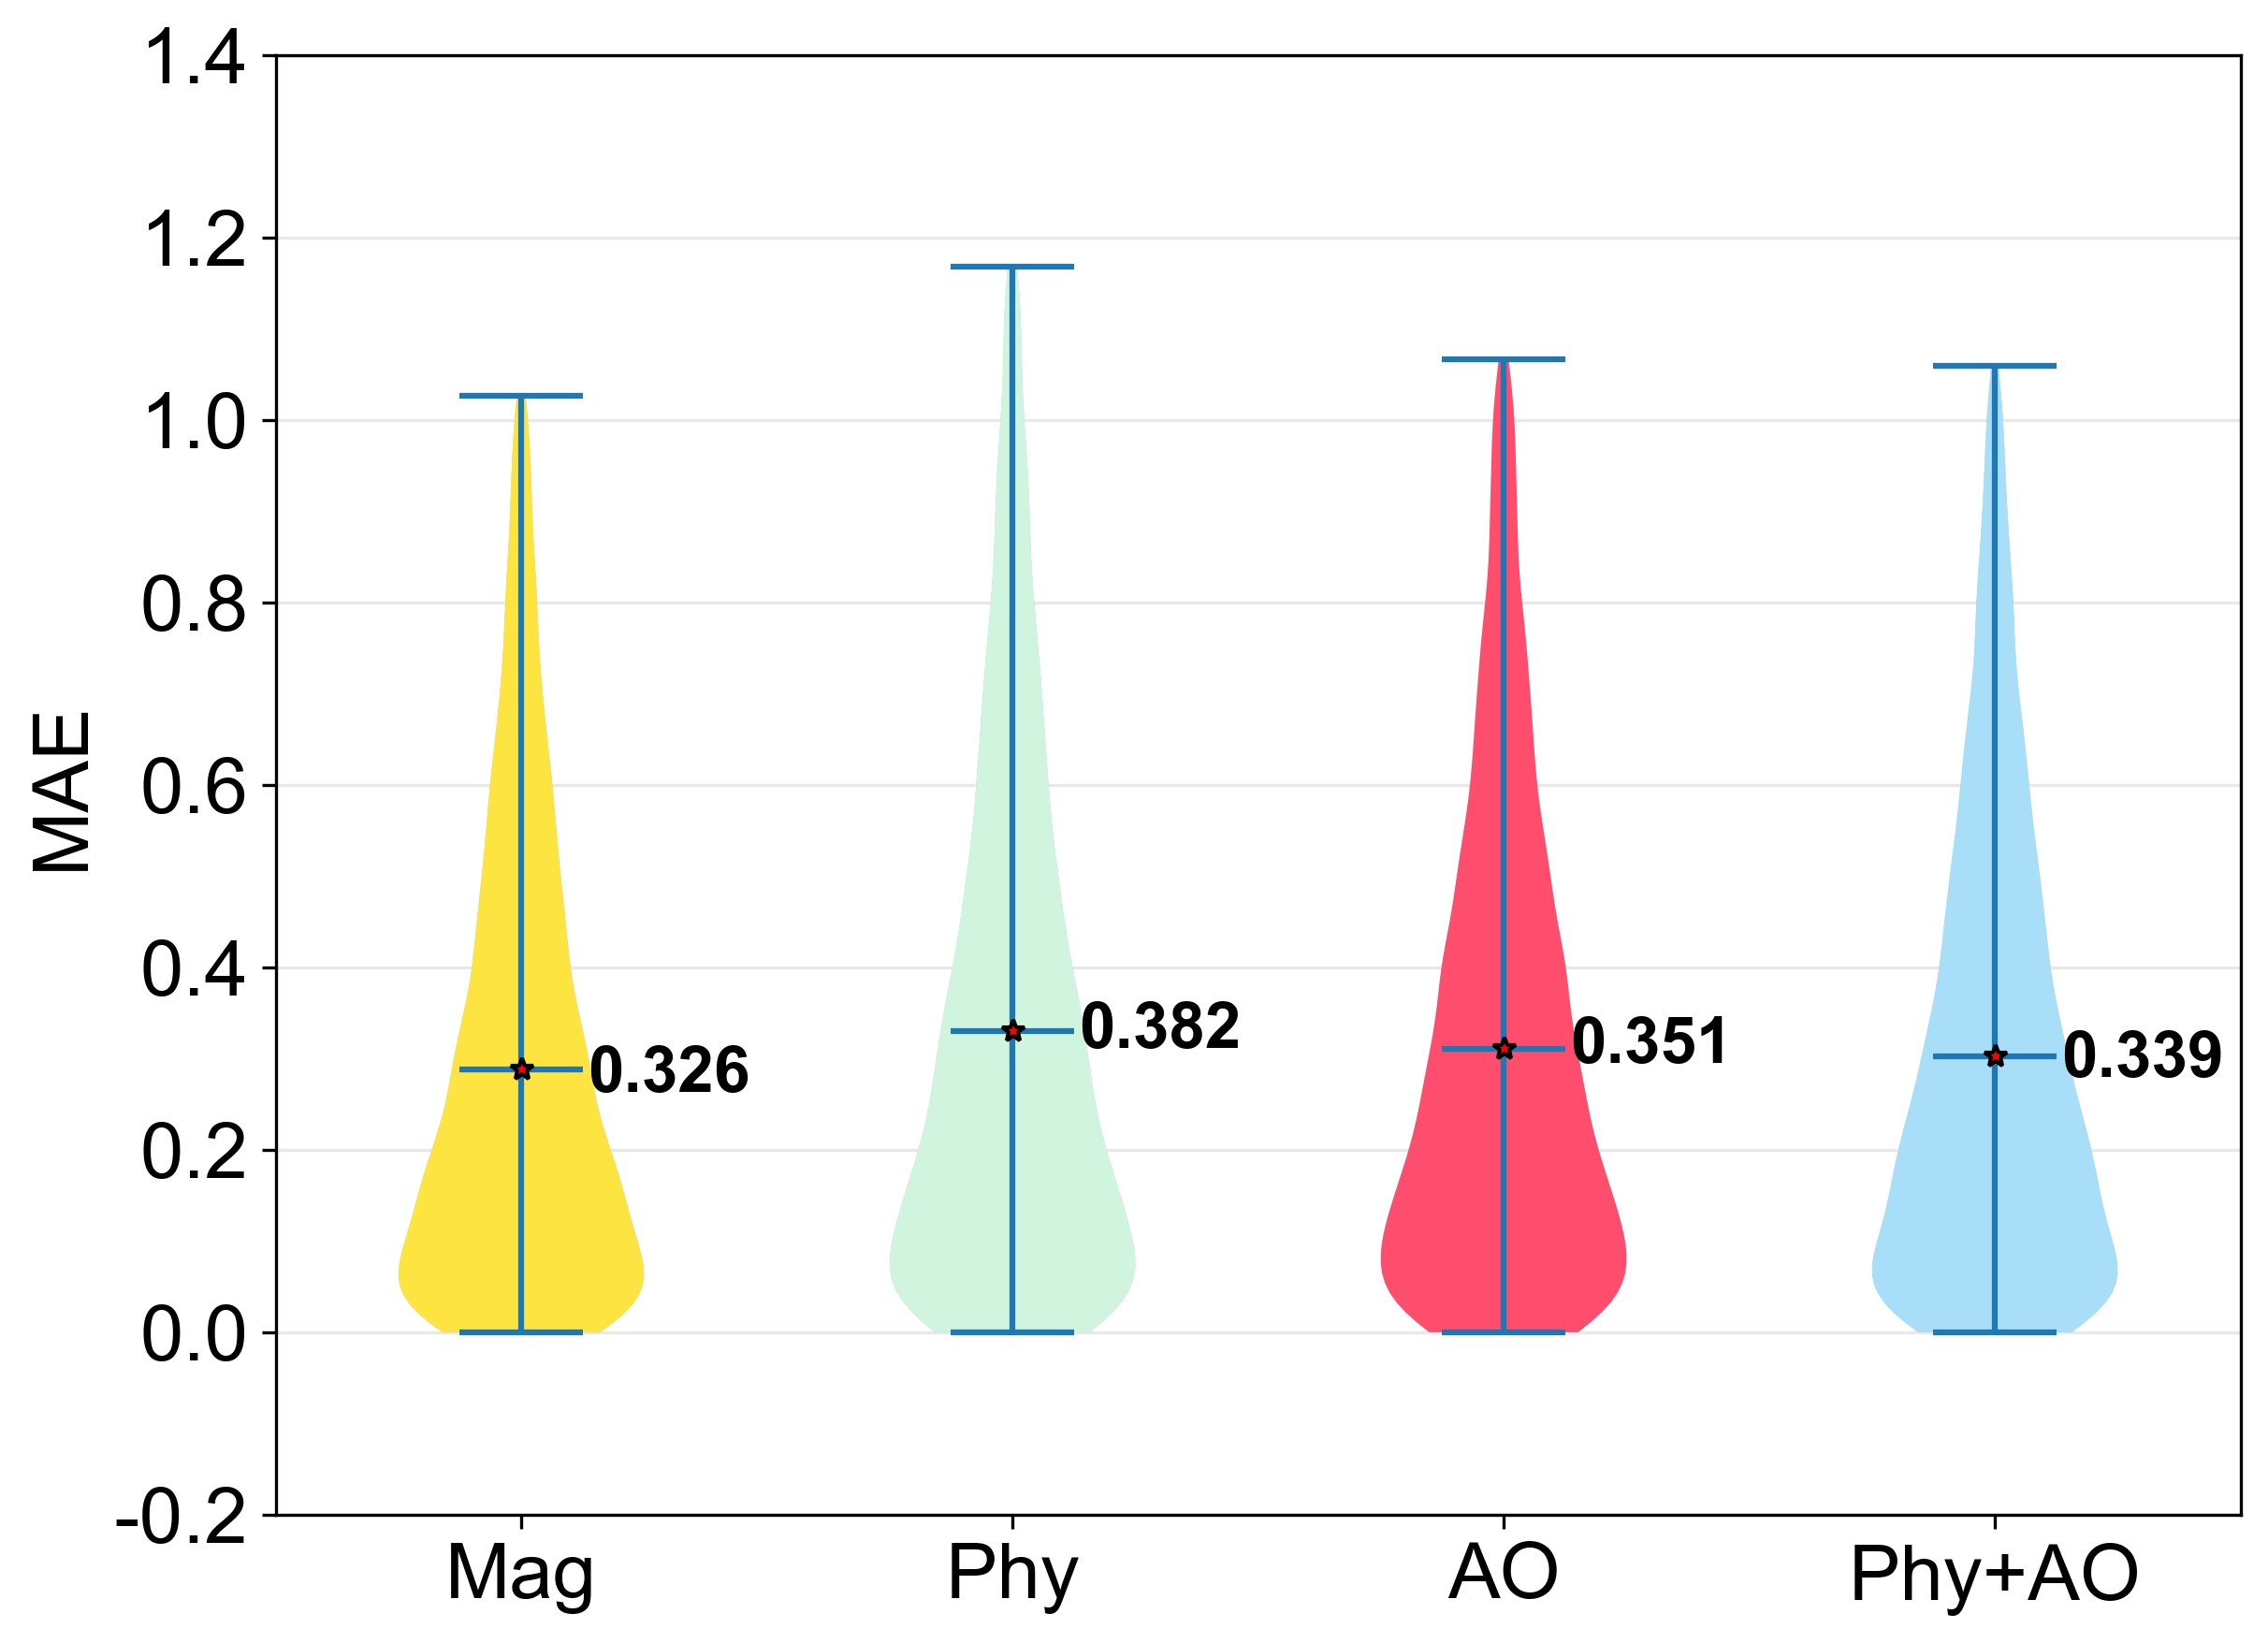

In [42]:
dists = ['Mag','Phy','AO','Phy+AO']
data = [magpie_test_error,origion_test_error,ec_test_error,new_test_error]
fig, ax1 = plt.subplots(figsize=(8, 8))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp=ax1.violinplot(data,showmeans=True,showmedians=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='MAE',
)
ax1.set_ylabel('MAE', fontsize=20) 


box_colors = ['#fee440', '#d0f4de','#ff4d6d','#a9def9']
box_colors_2 = ['#ffd60a','#80ed99','#ff4d6d','#0096c7']
mean_value = ['0.326','0.382','0.351','0.339']
pos_value = [.29, .32, .31, .3]
upper_labels = [s for s in mean_value]
weights = ['bold', 'semibold','semibold','bold']
num_violin = len(data)
medians = np.empty(num_violin)
for i in range(num_violin):
    box = bp['bodies'][i]
    box_x = box.get_paths()[0].vertices[:,0]
    box_y = box.get_paths()[0].vertices[:,1]
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 4]))
    # Now draw the median lines back over what we just filled in
#     med = np.median(data[i])
    med = np.mean(data[i])
#     ax1.hlines(med, np.min(box_x), np.max(box_x), color='black', linestyle='--', linewidth=2)

    # 绘制样本均值
    mean = np.mean(data[i])
    ax1.plot(np.mean(box_x), mean, color='red', marker='*', markeredgecolor='black')
    ax1.text(np.max(box_x)+0.05, pos_value[i], upper_labels[i],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[i], color='black')

ax1.set_xlim(0.5, num_violin + 0.5)
top = 1.4
bottom = -0.2
ax1.set_ylim(bottom, top)
ax1.set_xticks(np.arange(1, num_violin + 1))
ax1.set_xticklabels(dists, fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('虚拟样本误差分布.png',dpi=400, bbox_inches='tight')

plt.show()

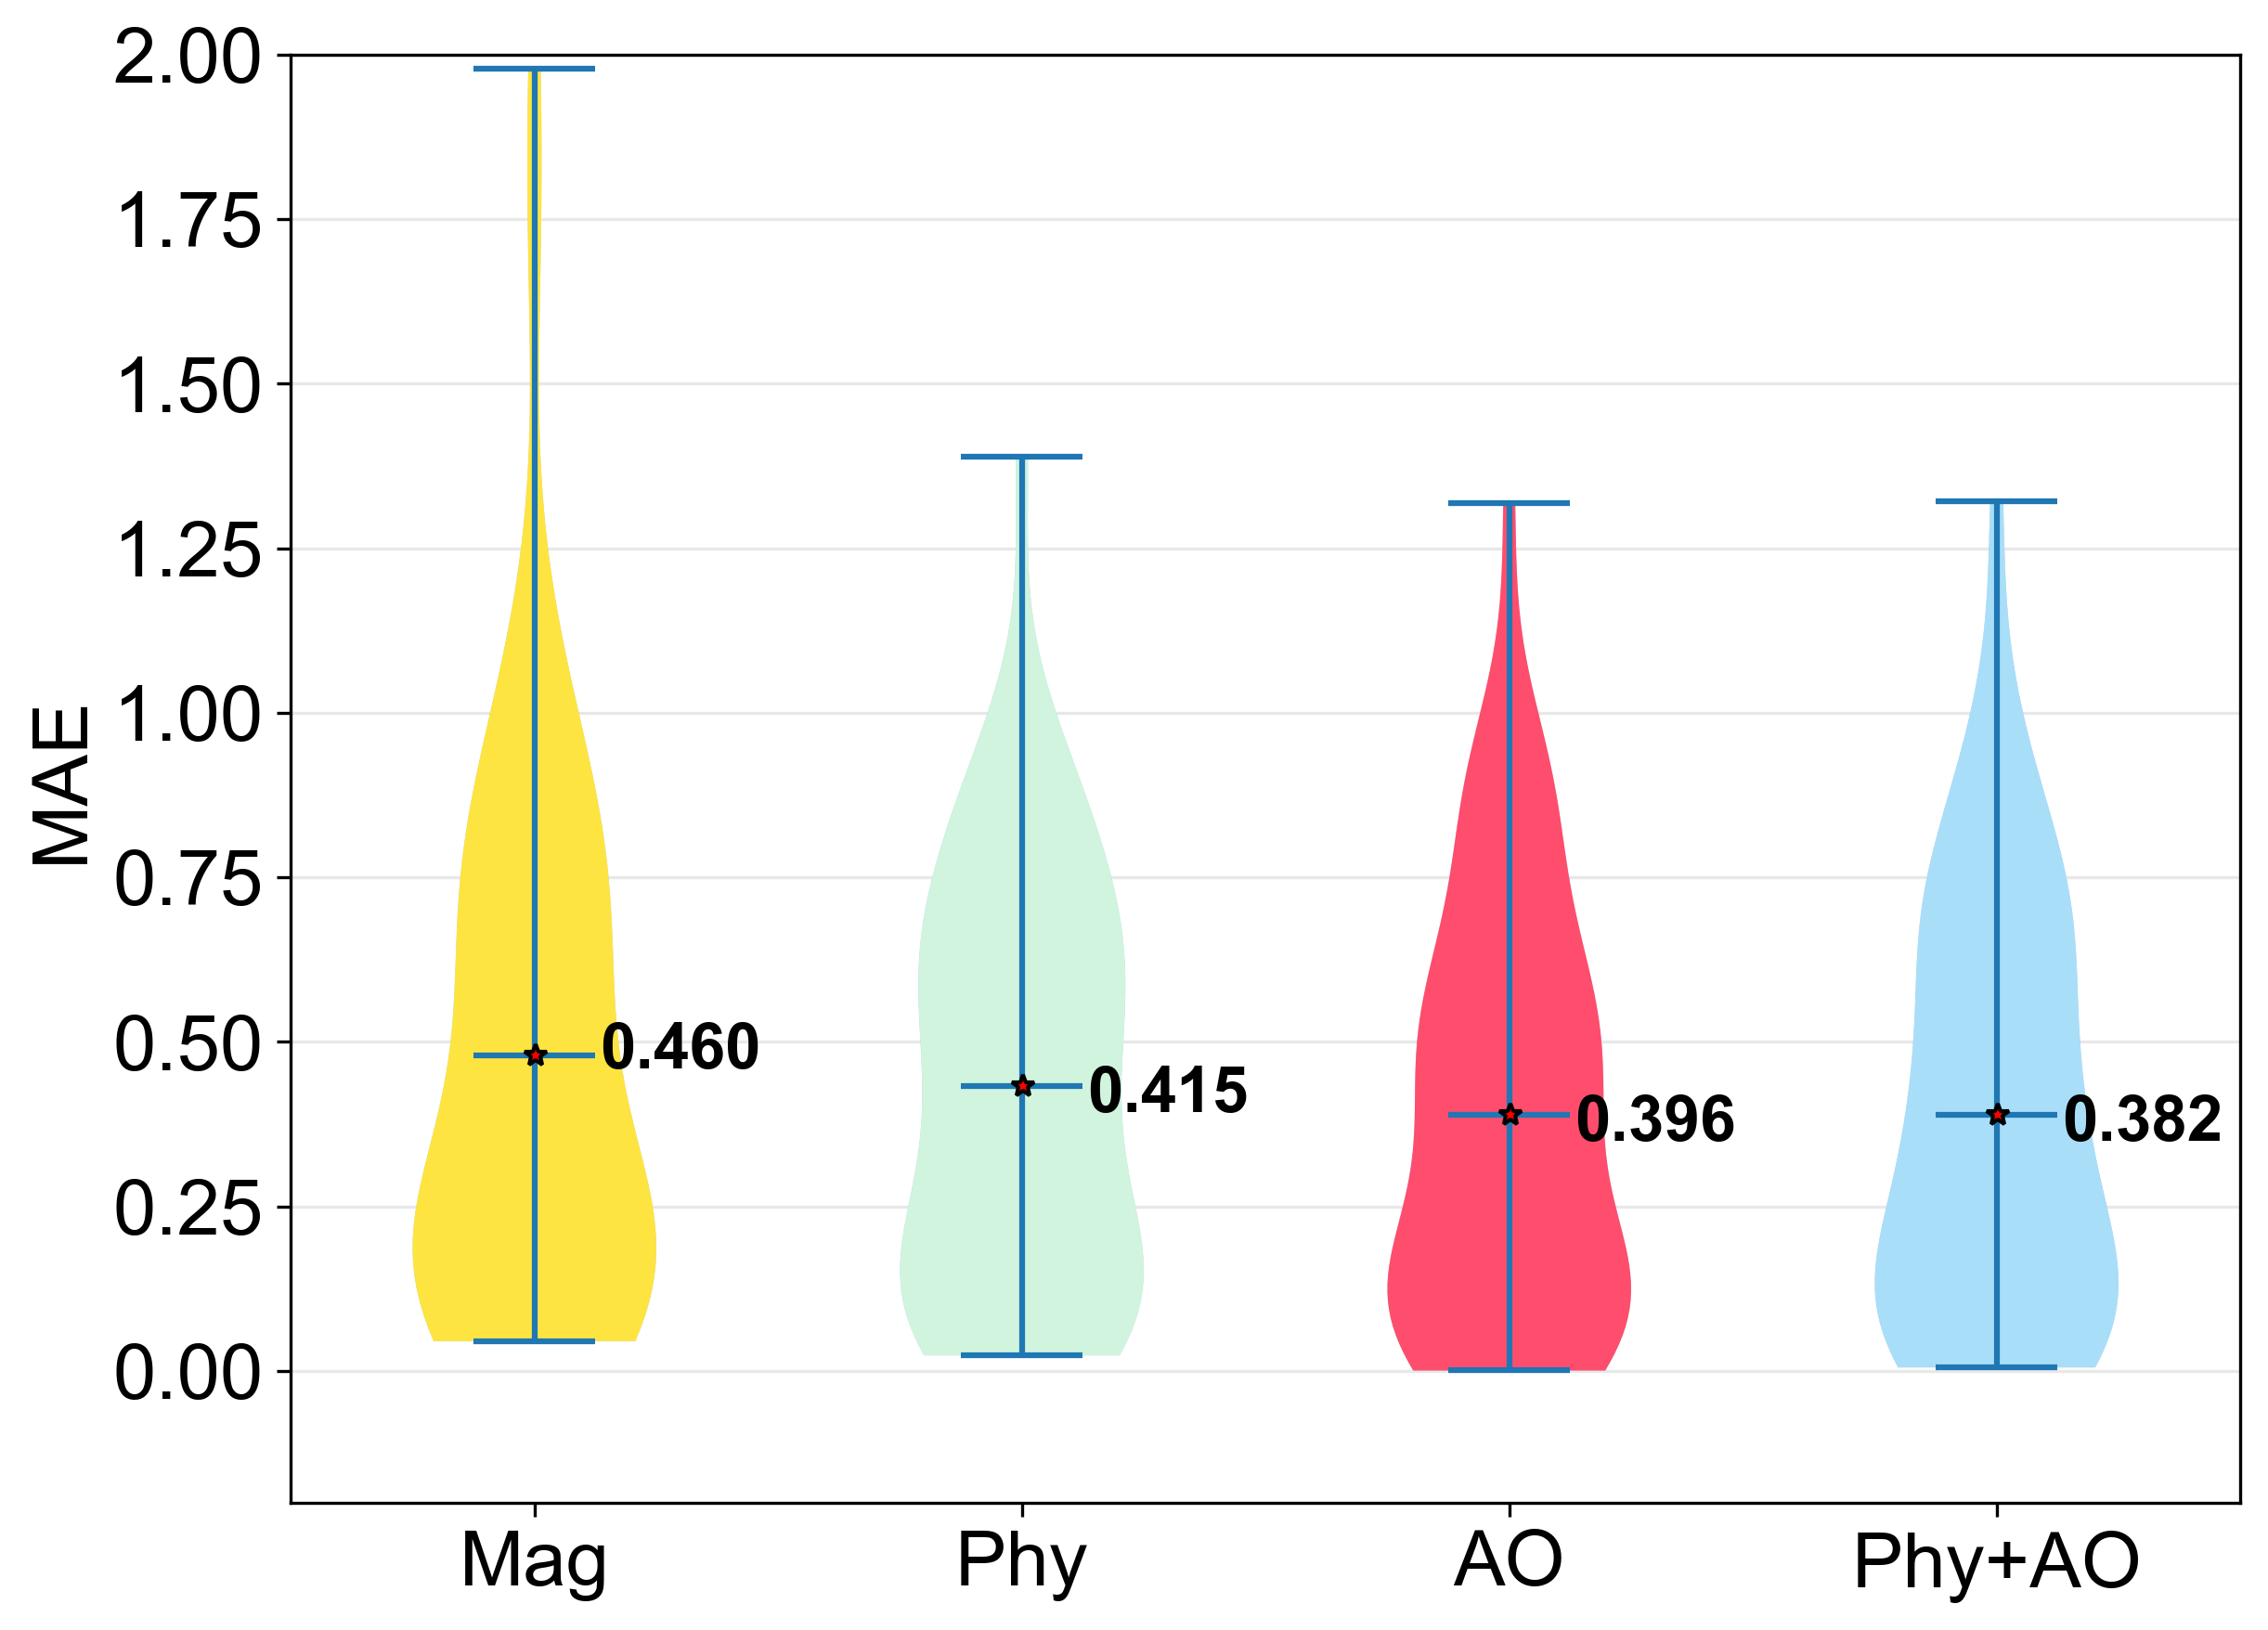

In [41]:
dists = ['Mag','Phy','AO','Phy+AO']
data = [magpie_valid_error,origion_valid_error,ec_valid_error,new_valid_error]
fig, ax1 = plt.subplots(figsize=(8, 8))

fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)


bp = ax1.violinplot(data,showmeans=True,showmedians=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='MAE'
)
ax1.set_ylabel('MAE', fontsize=20) 

box_colors = ['#fee440', '#d0f4de','#ff4d6d','#a9def9']
num_violin = len(data)
box_colors_2 = ['#ffd60a','#80ed99','#ff4d6d','#0096c7']
mean_value = ['0.460','0.415','0.396','0.382']
upper_labels = [s for s in mean_value]
weights = ['bold', 'semibold','semibold','bold']
pos_value = [.3, .27, .25,.25]
for i in range(num_violin):
    box = bp['bodies'][i]
    box_x = box.get_paths()[0].vertices[:,0]
    box_y = box.get_paths()[0].vertices[:,1]
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 4]))
    # Now draw the median lines back over what we just filled in
#     med = np.median(data[i])
    med = np.mean(data[i])
#     ax1.hlines(med, np.min(box_x), np.max(box_x), color='black', linestyle='--', linewidth=2)
#     medians[i] = med

    # 绘制样本均值
    mean = np.mean(data[i])
    ax1.plot(np.mean(box_x), mean, color='red', marker='*', markeredgecolor='black')
    ax1.text(np.max(box_x) + 0.05, pos_value[i], upper_labels[i],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[i], color='black')

ax1.set_xlim(0.5, num_violin + 0.5)
top = 2
bottom = -0.2
ax1.set_ylim(bottom, top)
ax1.set_xticks(np.arange(1, num_violin + 1))
ax1.set_xticklabels(dists, fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('小样本误差分布.png',dpi=400, bbox_inches='tight')
plt.show()